In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#for updating the centroid
import copy
from matplotlib.animation import FuncAnimation
# plt.style.use('ggplot')
%matplotlib inline

In [2]:
df=pd.DataFrame({'x':[12,13,14,65,34,80,72,42,28,34,56,75,30,18,21,77,63,36,70],
                'y':[39,36,53,52,32,30,54,66,63,56,58,73,46,23,8,14,9,7,24]})

In [3]:
np.random.seed(200)
#assuming we create three different cluster
#Chossing three random centeroid of the three cluster
k=4
centroid={
    i+1:[np.random.randint(0,80),np.random.randint(0,80)]
    for i in range(k)
}

In [4]:
centroid[1][1]

16

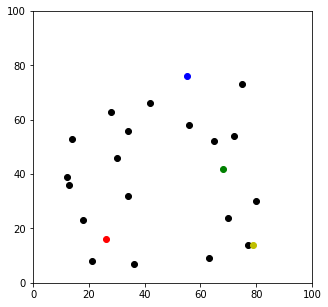

In [5]:
fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color='k')
colormap={1:'r',2:'g',3:'b',4:'y'}
for i in centroid.keys():
    plt.scatter(*centroid[i],color=colormap[i])
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

In [6]:
#Assignment steps
def assign(df,centroid):
    for i in centroid.keys():
        df['Distance_from_{}'.format(i)]=np.sqrt((df['x']-centroid[i][0])**2+(df['y']-centroid[i][1])**2)
    centroid_dist_cols=['Distance_from_{}'.format(i) for i in centroid.keys()]
    df['closest']=df.loc[:,centroid_dist_cols].idxmin(axis=1)
    df['closest']=df['closest'].map(lambda x : int(x.lstrip('Distance_from_')))
    df['color']=df['closest'].map(lambda x : colormap[x])
    return df

In [7]:
assign(df,centroid)

,x,y,Distance_from_1,Distance_from_2,Distance_from_3,Distance_from_4,closest,color
0,12,39,26.925824,56.080300,56.727418,71.512237,1,r
1,13,36,23.853721,55.326305,58.000000,69.570109,1,r
2,14,53,38.897301,55.108983,47.010637,75.802375,1,r
3,65,52,53.075418,10.440307,26.000000,40.496913,2,g
4,34,32,17.888544,35.440090,48.754487,48.466483,1,r
5,80,30,55.785303,16.970563,52.354560,16.031220,4,y
6,72,54,59.665736,12.649111,27.802878,40.607881,2,g
7,42,66,52.497619,35.383612,16.401219,63.820060,3,b
8,28,63,47.042534,45.177428,29.966648,70.724819,3,b
9,34,56,40.792156,36.769553,29.000000,61.554854,3,b


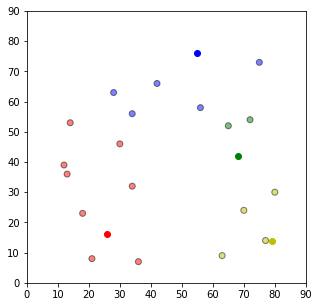

In [8]:
fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,edgecolors='k')

for i in centroid.keys():
    plt.scatter(*centroid[i],color=colormap[i])
plt.xlim(0,90)
plt.ylim(0,90)
plt.show()

After executing each asignment block execute update centroid block  


In [9]:
np.mean(df[df['closest']==1]['x'])#just for checking the mean of the gropued cluster for red points

22.25

In [22]:
df=assign(df,centroid)

In [23]:
old_centroid=copy.deepcopy(centroid)
def update(k):
    for i in k.keys():
        centroid[i][0]=np.mean(df[df['closest']==i]['x'])
        centroid[i][1]=np.mean(df[df['closest']==i]['y'])
    return k
centroid=update(centroid)

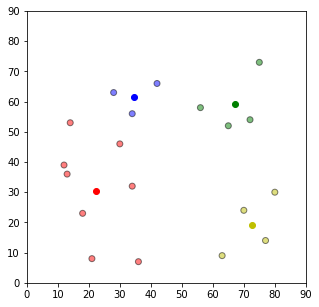

In [24]:
fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,edgecolors='k')

for i in centroid.keys():
    plt.scatter(*centroid[i],color=colormap[i])
plt.xlim(0,90)
plt.ylim(0,90)
plt.show()

In [25]:
df=assign(df,centroid)

In [26]:
old_centroid=copy.deepcopy(centroid)
def update(k):
    for i in k.keys():
        centroid[i][0]=np.mean(df[df['closest']==i]['x'])
        centroid[i][1]=np.mean(df[df['closest']==i]['y'])
    return k
centroid=update(centroid)

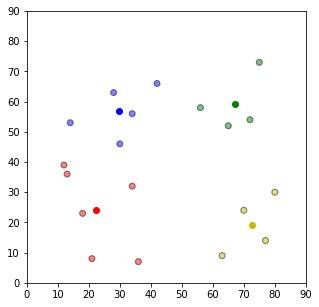

In [27]:
fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,edgecolors='k')

for i in centroid.keys():
    plt.scatter(*centroid[i],color=colormap[i])
plt.xlim(0,90)
plt.ylim(0,90)
plt.show()

In [28]:
old_centroid=copy.deepcopy(centroid)
def update(k):
    for i in k.keys():
        centroid[i][0]=np.mean(df[df['closest']==i]['x'])
        centroid[i][1]=np.mean(df[df['closest']==i]['y'])
    return k
centroid=update(centroid)

In [29]:
centroid

{1: [22.333333333333332, 24.166666666666668],
 2: [67.0, 59.25],
 3: [29.6, 56.8],
 4: [72.5, 19.25]}

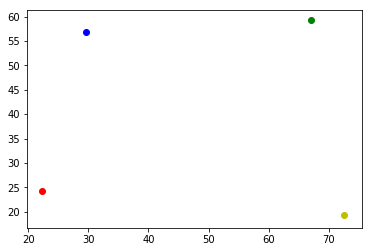

In [30]:
for i in centroid.keys():
    plt.scatter(*centroid[i],color=colormap[i])
plt.show()

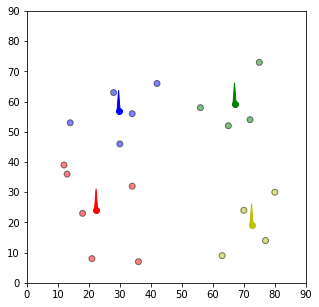

In [31]:
fig=plt.figure(figsize=(5,5))
ax=plt.axes()
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,edgecolors='k')

for i in centroid.keys():
    plt.scatter(*centroid[i],color=colormap[i])
plt.xlim(0,90)
plt.ylim(0,90)
for i in old_centroid.keys():
    old_x=old_centroid[i][0]
    old_y=old_centroid[i][1]
    dx=(centroid[i][0]-old_centroid[i][0])*0.75
    dy=(centroid[i][1]-old_centroid[i][1])*0.750
    ax.arrow(old_x,old_y,dx,dy,head_width=1,head_length=7,fc=colormap[i],ec=colormap[i])
plt.show()

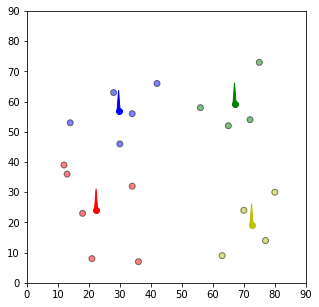

In [32]:
fig=plt.figure(figsize=(5,5))
ax=plt.axes()
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,edgecolors='k')

for i in centroid.keys():
    plt.scatter(*centroid[i],color=colormap[i])
plt.xlim(0,90)
plt.ylim(0,90)
for i in old_centroid.keys():
    old_x=old_centroid[i][0]
    old_y=old_centroid[i][1]
    dx=(centroid[i][0]-old_centroid[i][0])*0.75
    dy=(centroid[i][1]-old_centroid[i][1])*0.750
    ax.arrow(old_x,old_y,dx,dy,head_width=1,head_length=7,fc=colormap[i],ec=colormap[i])
    
    
plt.show()


In [21]:
old_x

72.5

<Figure size 432x288 with 0 Axes>